# COGNIFYZ INTERNSHIP - DATA ANALYSIS

## LEVEL - 3

## Restaurant Reviews - Task 1

### 1. Analyze The Text Reviews To Identify The Most Common Positive and Negative Keywords.
### 2. Calculate The Average Length Of Reviews and Explore If There Is a Relationship Between Review Length and Rating.

### Import Required Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

In [3]:
import nltk

# nltk.download('vader_lexicon')
# nltk.download('stopwords')
# nltk.download('punkt')

### Read The Data

In [4]:
file_path=("C:\\Users\\Navya\\OneDrive\\Desktop\\OneDrive\\Documents\\Cognifyz_Dataset 1.csv")
Cognifyz_df=pd.read_csv(file_path)
Cognifyz_df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


## Restaurant Reviews - Task 1

### 1. Analyze The Text Reviews To Identify The Most Common Positive and Negative Keywords.

In [5]:
rating_texts=Cognifyz_df['Rating text']
rating_texts

0       Excellent
1       Excellent
2       Very Good
3       Excellent
4       Excellent
          ...    
9546    Very Good
9547    Very Good
9548         Good
9549    Very Good
9550    Very Good
Name: Rating text, Length: 9551, dtype: object

In [6]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords

# Download The Vodar_Lexicon Resource
nltk.download('vader_lexicon')

# Your Existing Code
sia = SentimentIntensityAnalyzer()
stop_words = set(stopwords.words('english'))

# Rest Of Your Code.

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Navya\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [7]:
positive=[]
negative=[]

In [8]:
for rating_text in rating_texts:
    tokens=word_tokenize(rating_text.lower())
    tokens=[token for token in tokens if token.isalpha() and token not in stop_words]
    
    sentiment_score=sia.polarity_scores(rating_text)['compound']
    
    if sentiment_score>=0.2:
        positive.extend(tokens)
    elif sentiment_score<=0.2:
         negative.extend(tokens)

In [9]:
positive_counts=Counter(positive)
negative_counts=Counter(negative)

In [10]:
num_top_keywords = 10
print('\nTop Positive:')
for keyword, count in positive_counts.most_common(num_top_keywords):
    print(f"{keyword}:{count} times")


Top Positive:
good:3179 times
excellent:301 times


In [11]:
print('\nTop Negative Keywords:')
for keyword, count in negative_counts.most_common(num_top_keywords):
    print(f"{keyword}:{count} times")


Top Negative Keywords:
average:3737 times
rated:2148 times
poor:186 times


### 2. Calculate The Average Length Of Reviews and Explore If There Is a Relationship Between Review Length and Rating.

In [12]:
Cognifyz_df_analyzed = Cognifyz_df[['Rating text', 'Aggregate rating']].copy()
Cognifyz_df_analyzed['Review Length'] = Cognifyz_df_analyzed['Rating text'].apply(lambda x: len(str(x)))
average_rev_len = Cognifyz_df_analyzed.groupby('Aggregate rating')['Review Length'].mean()

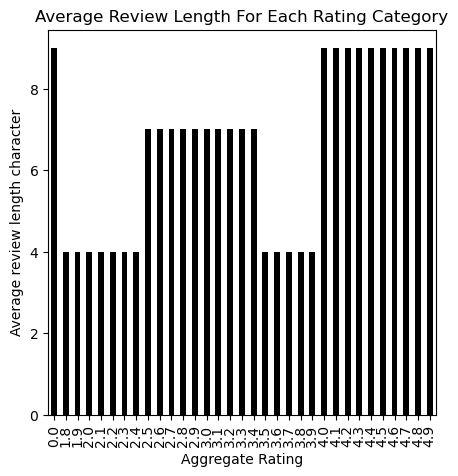

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
average_rev_len.plot(kind='bar', color='black')
plt.title('Average Review Length For Each Rating Category')
plt.xlabel('Aggregate Rating')
plt.ylabel('Average review length character')
plt.show()

## Votes Analysis - Task 2

### 1. Identify The Restaurants With The Highest and Lowest Number Of Votes.

In [14]:
Cognifyz_df_votes=Cognifyz_df[['Votes','Restaurant Name']]
Cognifyz_df_votes

,Votes,Restaurant Name
0,314,Le Petit Souffle
1,591,Izakaya Kikufuji
2,270,Heat - Edsa Shangri-La
3,365,Ooma
4,229,Sambo Kojin
...,...,...
9546,788,Naml۱ Gurme
9547,1034,Ceviz A��ac۱
9548,661,Huqqa
9549,901,A���k Kahve


In [15]:
print('Restaurant with highest votes:')
max_votes=Cognifyz_df_votes.loc[Cognifyz_df_votes['Votes'].idxmax()]
max_votes

Restaurant with highest votes:


Votes              10934
Restaurant Name     Toit
Name: 728, dtype: object

In [16]:
print('Restaurant with lowest votes:')
min_votes = Cognifyz_df_votes.loc[Cognifyz_df_votes['Votes'].idxmin()] 
min_votes

Restaurant with lowest votes:


Votes                             0
Restaurant Name    Cantinho da Gula
Name: 69, dtype: object

### 2. Analyze If There Is a Correlation Between The Number Of Votes and The Rating Of a Restaurant.

In [17]:
Cognifyz_df_analysis = Cognifyz_df[['Votes','Aggregate rating']].copy()
Cognifyz_df_analysis

,Votes,Aggregate rating
0,314,4.8
1,591,4.5
2,270,4.4
3,365,4.9
4,229,4.8
...,...,...
9546,788,4.1
9547,1034,4.2
9548,661,3.7
9549,901,4.0


In [18]:
corr=Cognifyz_df_analysis['Votes'].corr(Cognifyz_df_analysis["Aggregate rating"])
corr

0.31369058419541135

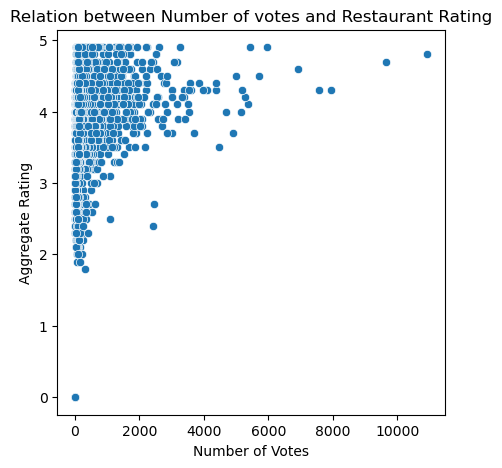

In [19]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='Votes',y='Aggregate rating',data=Cognifyz_df_analysis)
plt.title('Relation between Number of votes and Restaurant Rating')
plt.xlabel("Number of Votes")
plt.ylabel('Aggregate Rating')
plt.show()

## Price Range V/S Online Delivery and Table Booking - Task 3

### 1. Analyze If There Is a Relationship Between The Price Range and The Availability Of Online Delivery and Table Booking.

In [20]:
Cognifyz_idf_analysis = Cognifyz_df[['Price range', 'Has Table booking']].copy()
Cognifyz_idf_analysis['Has Online delivery'] = Cognifyz_df['Has Online delivery'].map({'Yes': True, 'No': False})
Cognifyz_idf_analysis['Has Table booking'] = Cognifyz_df['Has Table booking'].map({'Yes': True, 'No': False})

In [21]:
summary_table = pd.pivot_table(Cognifyz_idf_analysis, index='Price range', values=['Has Online delivery', 'Has Table booking'], aggfunc='sum')

In [22]:
print('Summary Table:')
summary_table

Summary Table:


,Has Online delivery,Has Table booking
Price range,,
1,701,1
2,1286,239
3,411,644
4,53,274


<Figure size 1000x800 with 0 Axes>

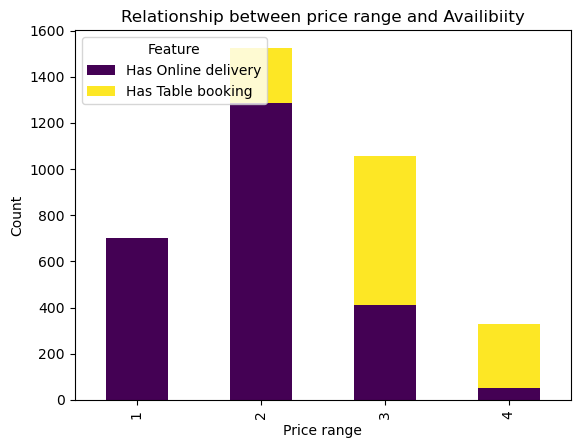

In [23]:
plt.figure(figsize=(10,8))
summary_table.plot(kind='bar',stacked=True,colormap='viridis')
plt.title('Relationship between price range and Availibiity')
plt.xlabel('Price range')
plt.ylabel('Count')
plt.legend(title='Feature',loc='upper left')
plt.show()

### 2. Determine If Higher - Priced Restaurants are More Likely To Offer These Services.

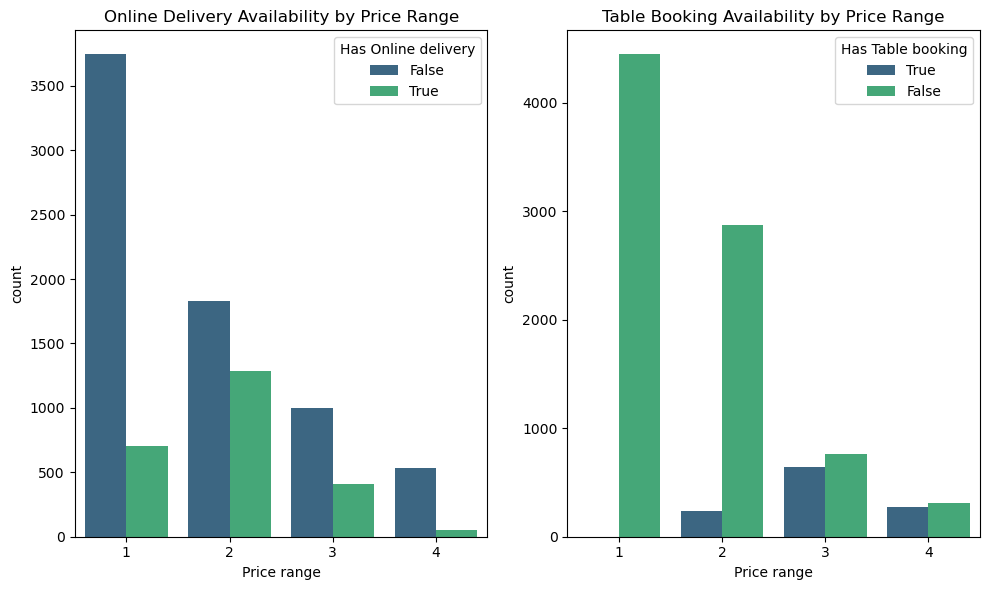

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert boolean values to strings
Cognifyz_idf_analysis['Has Online delivery'] = Cognifyz_idf_analysis['Has Online delivery'].astype(str)
Cognifyz_idf_analysis['Has Table booking'] = Cognifyz_idf_analysis['Has Table booking'].astype(str)

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='Price range', hue='Has Online delivery', data=Cognifyz_idf_analysis, palette='viridis')
plt.title('Online Delivery Availability by Price Range')

plt.subplot(1, 2, 2)
sns.countplot(x='Price range', hue='Has Table booking', data=Cognifyz_idf_analysis, palette='viridis')
plt.title('Table Booking Availability by Price Range')

plt.tight_layout()
plt.show()

# THANK YOU !!!.....